In [12]:
!pip install pillow
!pip install ffmpeg-python

In [1]:
import ffmpeg
import numpy as np
import tensorflow as tf

from transnet import TransNetParams, TransNet
from transnet_utils import draw_video_with_predictions, scenes_from_predictions


params = TransNetParams()
params.CHECKPOINT_PATH = "./model/transnet_model-F16_L3_S2_D256"



Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
net = TransNet(params)

Creating Build
           Input (?, ?, 27, 48, 3)
           SDDCNN_1
           > DDCNN_1 (?, ?, 27, 48, 64)
           > DDCNN_2 (?, ?, 27, 48, 64)
           MaxPool (?, ?, 13, 24, 64)
           SDDCNN_2
           > DDCNN_1 (?, ?, 13, 24, 128)
           > DDCNN_2 (?, ?, 13, 24, 128)
           MaxPool (?, ?, 6, 12, 128)
           SDDCNN_3
           > DDCNN_1 (?, ?, 6, 12, 256)
           > DDCNN_2 (?, ?, 6, 12, 256)
           MaxPool (?, ?, 3, 6, 256)
           Flatten (?, ?, 4608)
           Dense (?, ?, 256)
           Logits (?, ?, 2)
           Predictions (?, ?)
Network built.
Found 4614850 trainable parameters.
INFO:tensorflow:Restoring parameters from ./model/transnet_model-F16_L3_S2_D256
Parameters restored from 'transnet_model-F16_L3_S2_D256'.


In [3]:
video_stream, err = (
    ffmpeg
    .input('test.mp4')
    .output('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(params.INPUT_WIDTH, params.INPUT_HEIGHT))
    .run(capture_stdout=True)
)
video = np.frombuffer(video_stream, np.uint8).reshape([-1, params.INPUT_HEIGHT, params.INPUT_WIDTH, 3])

In [4]:
predictions = net.predict_video(video)

Processing video frames 544/544


In [5]:
print(predictions.shape)

(544,)


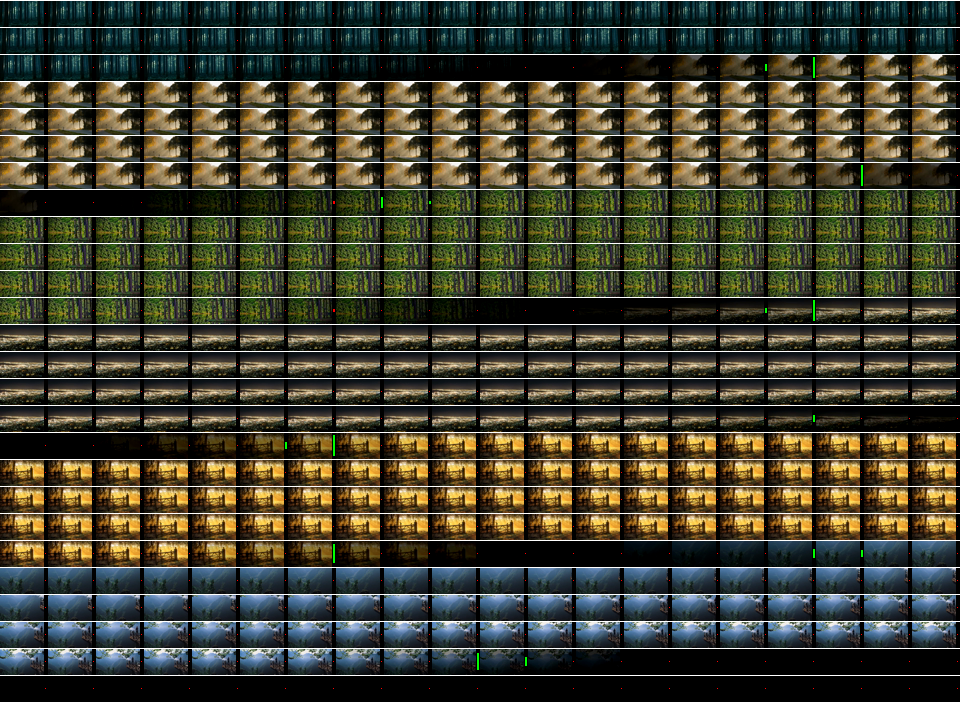

In [13]:
draw_video_with_predictions(video[42:], predictions[42:], threshold=0.1)

In [10]:
scenes = scenes_from_predictions(predictions, threshold=0.1)
print(scenes)

[[  0  97]
 [ 99 179]
 [180 189]
 [191 277]
 [279 358]
 [359 367]
 [369 448]
 [449 458]
 [460 531]
 [533 543]]


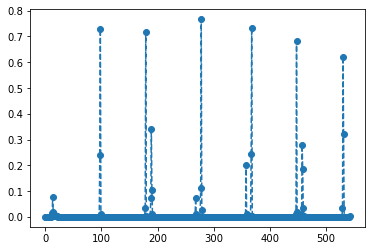

In [15]:
from matplotlib import pyplot as plt

plt.plot(predictions, marker='o', linestyle='--')
#plt.xlim(0,10)
plt.show()